<a href="https://colab.research.google.com/github/Jaideepgarlyal15/SentimentAnalysis-of-the-Text-based-dataset/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import pandas as pd
pd.set_option('display.max_colwidth', 2000)
#!pip install transformers
from transformers import pipeline
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [12]:
sns.set()

In [4]:
classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


**Helper Functions**

In [5]:
def sentiment_analysis(data):
    polarity=[] # list which will contain the polarity of the comments
    sentiment=[] # list which will contain the subjectivity of the comments
    for i in data['Log_contents'].values:
        try:
            polarity.append(classifier(i)[0]['score'])
            sentiment.append(classifier(i)[0]['label'])

        except:
            polarity.append(0)
            sentiment.append(0)
    data['polarity']=polarity
    data['sentiment']=sentiment
    print("Sentiment split :",data.sentiment.value_counts())
    data.head()
    return data

**Sentiment Analysis on HealtApp Logs using BERT(distilbert)**

In [6]:
!unzip -o '/content/drive/MyDrive/Colab Notebooks/HealthApp.log.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/HealthApp.log.zip
  inflating: HealthApp.log           
  inflating: __MACOSX/._HealthApp.log  


In [35]:

data = pd.read_csv('/content/HealthApp.log', sep = '|', header= None, on_bad_lines='skip')
data.rename(columns={ 0: 'timestamp', 1: 'step', 2: 'user_id', 3: 'Log_contents'}, inplace = True)
df = sentiment_analysis(data.sample(1000))
df.head()




Sentiment split : NEGATIVE    976
POSITIVE     24
Name: sentiment, dtype: int64


,timestamp,step,user_id,Log_contents,polarity,sentiment
45413,20171225-19:9:5:279,Step_LSC,30002312,onExtend:1514200146000 4 0 4,0.827553,NEGATIVE
25768,20171224-20:28:43:360,Step_LSC,30002312,onExtend:1514118519000 89 0 4,0.867540,NEGATIVE
202344,201811-18:40:3:6,Step_SPUtils,30002312,setTodayTotalDetailSteps=1514803140000##1856##95438##31610##18631##117246673,0.974296,NEGATIVE
180926,20171231-10:21:15:437,Step_ExtSDM,30002312,calculateAltitudeWithCache totalAltitude=180,0.976508,NEGATIVE
58599,20171225-22:10:20:886,HiH_HiHealthBinder,30002312,insertHiHealthData() end totalTime = 30,0.991369,NEGATIVE


In [31]:
data = pd.read_csv('/content/HealthApp.log', sep = '|', header= None, on_bad_lines='skip')
data.rename(columns={ 0: 'timestamp', 1: 'step', 2: 'user_id', 3: 'action'}, inplace = True)
data.head()


,timestamp,step,user_id,action
0,20171223-22:15:29:606,Step_LSC,30002312,onStandStepChanged 3579
1,20171223-22:15:29:615,Step_LSC,30002312,onExtend:1514038530000 14 0 4
2,20171223-22:15:29:633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON
3,20171223-22:15:29:635,Step_LSC,30002312,processHandleBroadcastAction action:android.intent.action.SCREEN_ON
4,20171223-22:15:29:635,Step_StandStepCounter,30002312,flush sensor data


In [50]:
data.drop('user_id', axis=1, inplace=True)

In [51]:
df.columns
data.columns

Index(['timestamp', 'step', 'Log_contents'], dtype='object')

In [46]:
df['user_id'].unique()

array([30002312])

In [53]:
df.to_csv('health.csv')

(array([976.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  24.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

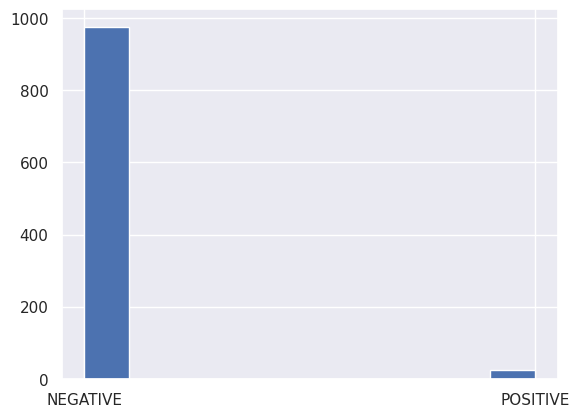

In [52]:
plt.hist(df['sentiment'])

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


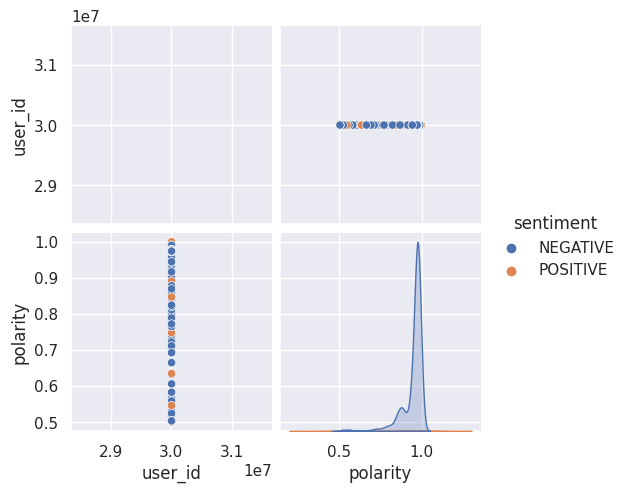

In [54]:
sns.pairplot(df, hue='sentiment', size=2.5);

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 45413 to 174523
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     1000 non-null   object 
 1   step          1000 non-null   object 
 2   user_id       1000 non-null   int64  
 3   Log_contents  1000 non-null   object 
 4   polarity      1000 non-null   float64
 5   sentiment     1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 54.7+ KB


**Tableau Presentation**
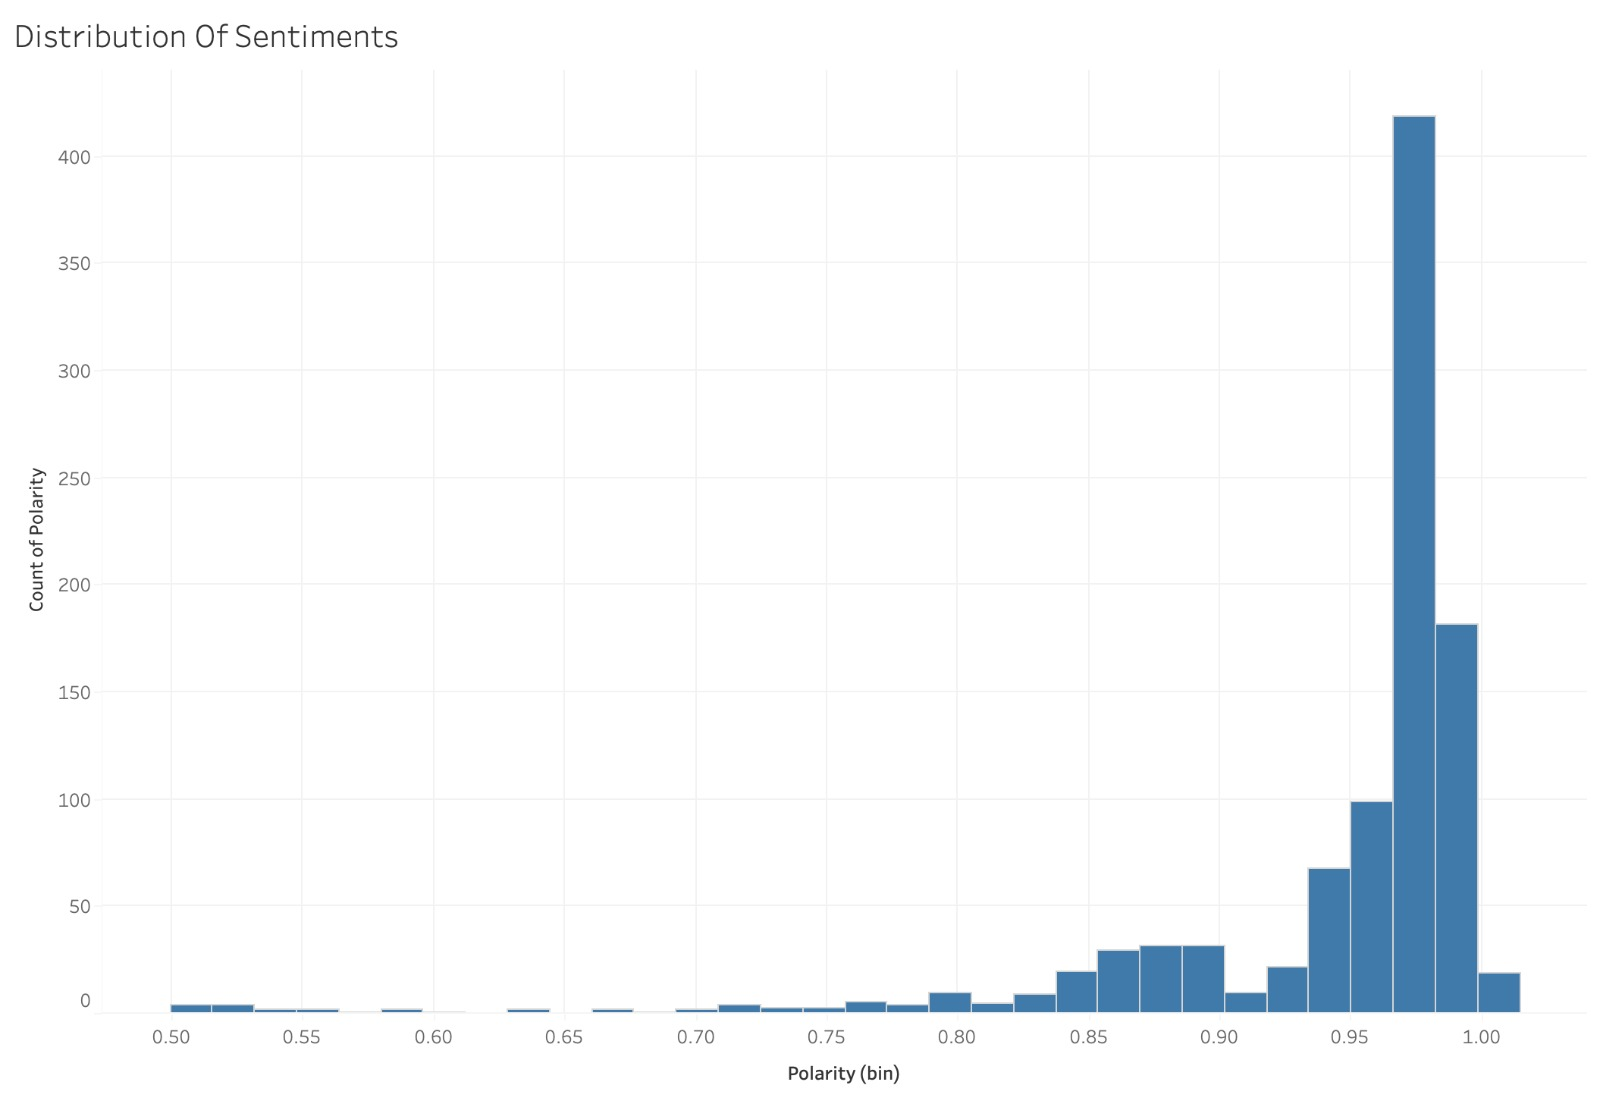


Hence we have constructed the Analysis with the Tableau for the better understanding of the dataset, since the data was in Text format and there was no classification in the dataset, so Cleaned all the values and notationed all the important labels and hence we got this these classification of **negative and positive** *(Polarity)*.

